## Task-7 : Nifty Prediction & Sentiment Analysis Hybrid Model
### Arindam Ghosh
#### Data Science & Business Analytics Internship

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,confusion_matrix, accuracy_score, roc_curve, classification_report
from textblob import TextBlob

In [3]:
# Load stock price data
stock_data = pd.read_csv(r"C:\Users\Lenovo\Desktop\TSF\^NSEI (1).csv", parse_dates=['Date'], dayfirst=True)

# Load news headline data
news_data = pd.read_csv(r"C:\Users\Lenovo\Desktop\TSF\india-news-headlines.csv", dtype={'publish_date': str})

In [5]:
# Convert 'publish_date' to a datetime format
news_data['publish_date'] = pd.to_datetime(news_data['publish_date'], format='%Y%m%d')

In [6]:
# Explore stock price data
print("Stock Price Data:")
print(stock_data.head())
print(stock_data.info())


Stock Price Data:
        Date         Open         High          Low        Close    Adj Close  \
0 2007-10-01  5021.500000  5089.299805  5001.350098  5068.950195  5068.950195   
1 2007-10-03  5069.000000  5261.350098  5034.149902  5210.799805  5210.799805   
2 2007-10-04  5211.649902  5233.100098  5126.049805  5208.649902  5208.649902   
3 2007-10-05  5208.149902  5248.549805  5164.500000  5185.850098  5185.850098   
4 2007-10-08  5186.250000  5249.299805  5024.750000  5085.100098  5085.100098   

   Volume  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       817 non-null    datetime64[ns]
 1   Open       813 non-null    float64       
 2   High       813 non-null    float64       
 3   Low        813 non-null    float64       
 4   Close      813 non-null    float

In [7]:
# Explore news headline data
print("\nNews Headline Data:")
print(news_data.head())
print(news_data.info())


News Headline Data:
  publish_date headline_category  \
0   2001-01-02           unknown   
1   2001-01-02           unknown   
2   2001-01-02           unknown   
3   2001-01-02           unknown   
4   2001-01-02           unknown   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1                Fissures in Hurriyat over Pak visit  
2              America's unwanted heading for India?  
3                 For bigwigs; it is destination Goa  
4               Extra buses to clear tourist traffic  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 83.6+ MB
None


In [8]:
# Merge stock and news data based on the date (assuming 'Date' and 'publish_date' columns match)
merged_data = pd.merge(stock_data, news_data, left_on='Date', right_on='publish_date', how='inner')

In [9]:
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text
0,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.english.hollywood,Oprah tops the list of highest paid stars
1,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.others,Dhaval turns a year older
2,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.others,It's all about cricket
3,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.english.hollywood,Kate's love for chocolates
4,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.bangalore,Browse in style


In [10]:
# Check for missing values
print("\nMerged Data:")
print(merged_data.head())
print(merged_data.info())


Merged Data:
        Date    Open         High          Low        Close    Adj Close  \
0 2007-10-01  5021.5  5089.299805  5001.350098  5068.950195  5068.950195   
1 2007-10-01  5021.5  5089.299805  5001.350098  5068.950195  5068.950195   
2 2007-10-01  5021.5  5089.299805  5001.350098  5068.950195  5068.950195   
3 2007-10-01  5021.5  5089.299805  5001.350098  5068.950195  5068.950195   
4 2007-10-01  5021.5  5089.299805  5001.350098  5068.950195  5068.950195   

   Volume publish_date                headline_category  \
0     0.0   2007-10-01  entertainment.english.hollywood   
1     0.0   2007-10-01      entertainment.events.others   
2     0.0   2007-10-01      entertainment.events.others   
3     0.0   2007-10-01  entertainment.english.hollywood   
4     0.0   2007-10-01   entertainment.events.bangalore   

                               headline_text  
0  Oprah tops the list of highest paid stars  
1                  Dhaval turns a year older  
2                     It's all ab

In [11]:
# Perform Sentiment Analysis on headlines using TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

In [12]:
merged_data['headline_sentiment'] = merged_data['headline_text'].apply(get_sentiment)

In [13]:
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,headline_sentiment
0,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.english.hollywood,Oprah tops the list of highest paid stars,0.000000
1,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.others,Dhaval turns a year older,0.166667
2,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.others,It's all about cricket,0.000000
3,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.english.hollywood,Kate's love for chocolates,0.500000
4,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.bangalore,Browse in style,0.000000


In [14]:
print(merged_data.isnull().sum())

Date                     0
Open                  2011
High                  2011
Low                   2011
Close                 2011
Adj Close             2011
Volume                2011
publish_date             0
headline_category        0
headline_text            0
headline_sentiment       0
dtype: int64


In [15]:
null_counts = merged_data.isnull().sum()
print("\nMissing Values in Merged Data:")
print(null_counts)


Missing Values in Merged Data:
Date                     0
Open                  2011
High                  2011
Low                   2011
Close                 2011
Adj Close             2011
Volume                2011
publish_date             0
headline_category        0
headline_text            0
headline_sentiment       0
dtype: int64


In [16]:
merged_data.dropna(inplace=True)

In [17]:
null_counts = merged_data.isnull().sum()
print("\nMissing Values in Merged Data:")
print(null_counts)


Missing Values in Merged Data:
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
publish_date          0
headline_category     0
headline_text         0
headline_sentiment    0
dtype: int64


In [18]:
# Feature engineering (create lag features for stock prices)
num_lags = 5
for i in range(1, num_lags + 1):
    merged_data[f'lag_{i}_close'] = merged_data['Close'].shift(i)

In [19]:
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,headline_sentiment,lag_1_close,lag_2_close,lag_3_close,lag_4_close,lag_5_close
0,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.english.hollywood,Oprah tops the list of highest paid stars,0.000000,NaN,NaN,NaN,NaN,NaN
1,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.others,Dhaval turns a year older,0.166667,5068.950195,NaN,NaN,NaN,NaN
2,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.others,It's all about cricket,0.000000,5068.950195,5068.950195,NaN,NaN,NaN
3,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.english.hollywood,Kate's love for chocolates,0.500000,5068.950195,5068.950195,5068.950195,NaN,NaN
4,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.bangalore,Browse in style,0.000000,5068.950195,5068.950195,5068.950195,5068.950195,NaN


In [20]:
# Drop rows with NaN values (due to lag features)
merged_data.dropna(inplace=True)

In [21]:
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,headline_sentiment,lag_1_close,lag_2_close,lag_3_close,lag_4_close,lag_5_close
5,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.hindi.bollywood,I am a squash player too:Neha Dhupia,0.000000,5068.950195,5068.950195,5068.950195,5068.950195,5068.950195
6,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.hindi.bollywood,Remaking Shola was a mistake:Nisha,0.000000,5068.950195,5068.950195,5068.950195,5068.950195,5068.950195
7,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.hindi.bollywood,Marriage! Not right away: Bips,-0.142857,5068.950195,5068.950195,5068.950195,5068.950195,5068.950195
8,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.events.hyderabad,Fashion show in Hyderabad,0.000000,5068.950195,5068.950195,5068.950195,5068.950195,5068.950195
9,2007-10-01,5021.5,5089.299805,5001.350098,5068.950195,5068.950195,0.0,2007-10-01,entertainment.hindi.bollywood,Bhumika to tie a knot?,0.000000,5068.950195,5068.950195,5068.950195,5068.950195,5068.950195


In [22]:
merged_data.describe()

,Open,High,Low,Close,Adj Close,Volume,headline_sentiment,lag_1_close,lag_2_close,lag_3_close,lag_4_close,lag_5_close
count,373010.000000,373010.000000,373010.000000,373010.000000,373010.000000,373010.0,373010.000000,373010.000000,373010.000000,373010.000000,373010.000000,373010.000000
mean,4668.383800,4721.254872,4611.450420,4668.212945,4668.212945,0.0,0.025044,4668.211263,4668.209580,4668.207898,4668.206215,4668.204533
std,1028.807834,1023.297362,1032.416134,1027.166188,1027.166188,0.0,0.194412,1027.165018,1027.163848,1027.162677,1027.161507,1027.160337
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.0,-1.000000,2524.199951,2524.199951,2524.199951,2524.199951,2524.199951
25%,4162.149902,4237.250000,4092.250000,4161.250000,4161.250000,0.0,0.000000,4161.250000,4161.250000,4161.250000,4161.250000,4161.250000
50%,4907.850098,4966.299805,4845.899902,4914.000000,4914.000000,0.0,0.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
75%,5387.000000,5413.250000,5351.700195,5386.450195,5386.450195,0.0,0.000000,5386.450195,5386.450195,5386.450195,5386.450195,5386.450195
max,6335.250000,6357.100098,6269.250000,6301.549805,6301.549805,0.0,1.000000,6301.549805,6301.549805,6301.549805,6301.549805,6301.549805


In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373010 entries, 5 to 375025
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                373010 non-null  datetime64[ns]
 1   Open                373010 non-null  float64       
 2   High                373010 non-null  float64       
 3   Low                 373010 non-null  float64       
 4   Close               373010 non-null  float64       
 5   Adj Close           373010 non-null  float64       
 6   Volume              373010 non-null  float64       
 7   publish_date        373010 non-null  datetime64[ns]
 8   headline_category   373010 non-null  object        
 9   headline_text       373010 non-null  object        
 10  headline_sentiment  373010 non-null  float64       
 11  lag_1_close         373010 non-null  float64       
 12  lag_2_close         373010 non-null  float64       
 13  lag_3_close         373010 no

In [24]:
# Split data into train and test sets
X = merged_data[['lag_1_close', 'lag_2_close', 'lag_3_close', 'lag_4_close', 'lag_5_close', 'headline_sentiment']]
y = merged_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.1514361958234123


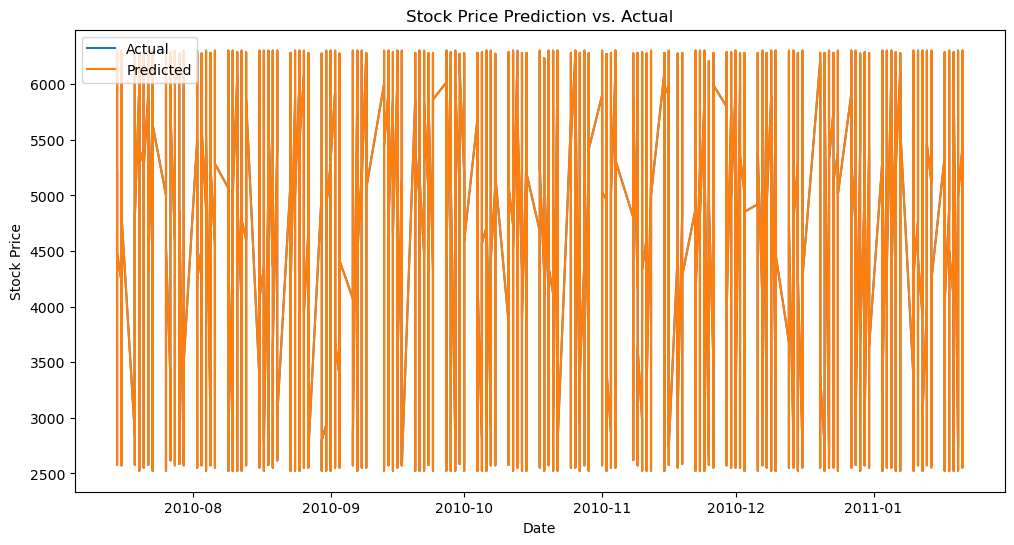

In [33]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(merged_data['Date'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price Prediction vs. Actual')
plt.show()

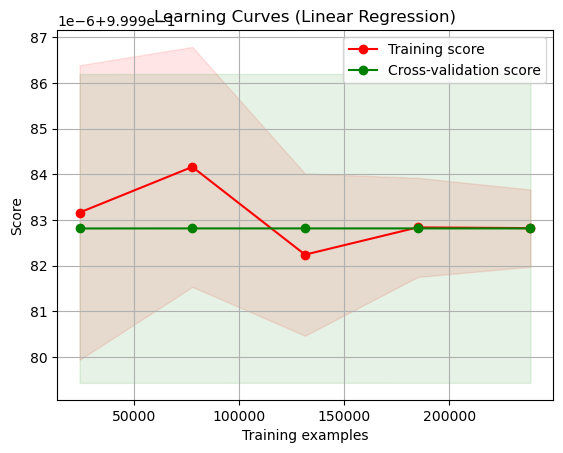

In [34]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create a learning curve plot
title = "Learning Curves (Linear Regression)"
plot_learning_curve(model, title, X_train, y_train, cv=5)
plt.show()


Mean Absolute Error (MAE): 0.1514
Mean Squared Error (MSE): 15.0460
Root Mean Squared Error (RMSE): 3.8789


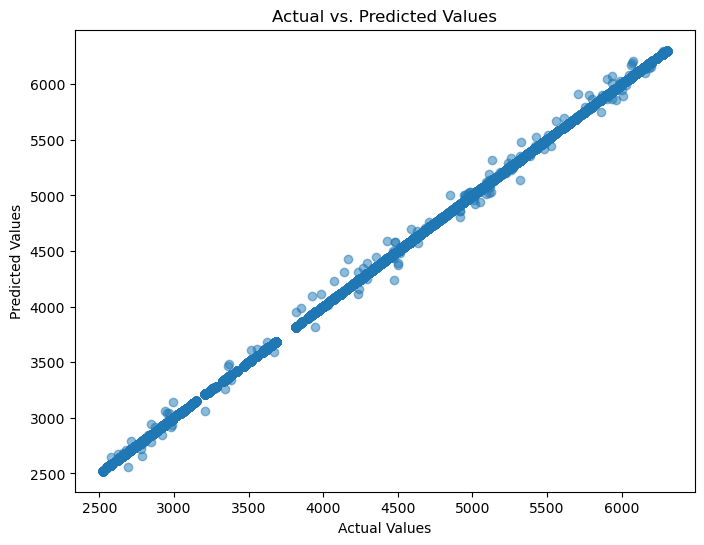

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()